モジュール読み込み

In [1]:
import pandas as pd
df = pd.read_csv('http://logopt.com/data/Advertising.csv', index_col=0)
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [2]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [6]:
from sklearn.linear_model import  LinearRegression
reg = LinearRegression()
reg.fit(X,y)
yhat = reg.predict(X)
print('y-切片 = ', reg.intercept_)
print('係数 = ', reg.coef_)
SSE = ((yhat-y)**2).sum()
SST = ((y.mean()-y)**2).sum()
print("R2 =", 1-SSE/SST)
print(reg.score(X,y))

y-切片 =  2.9388893694594103
係数 =  [ 0.04576465  0.18853002 -0.00103749]
R2 = 0.8972106381789522
0.8972106381789522


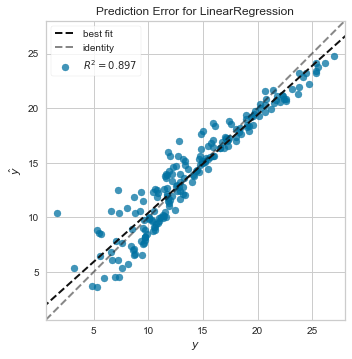

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [7]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(reg)

visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show()

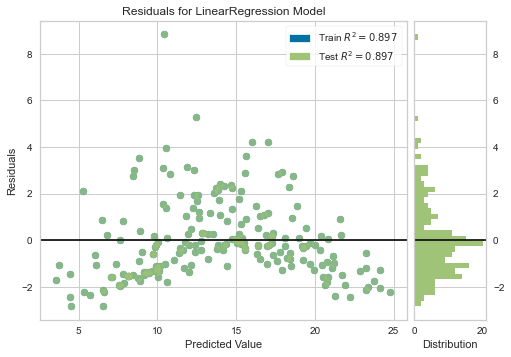

In [9]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(reg)

visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show();

In [10]:
import pandas as pd
diamond = pd.read_csv('http://logopt.com/data/Diamond.csv', index_col=0)
diamond.head()

,carat,colour,clarity,certification,price
1,0.30,D,VS2,GIA,1302
2,0.30,E,VS1,GIA,1510
3,0.30,G,VVS1,GIA,1510
4,0.30,G,VS1,GIA,1260
5,0.31,D,VS1,GIA,1641


In [11]:
diamond = pd.get_dummies(diamond)
diamond.head()

,carat,price,colour_D,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_GIA,certification_HRD,certification_IGI
1,0.30,1302,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.30,1510,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,0.30,1510,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0.30,1260,0,0,0,1,0,0,0,1,0,0,0,1,0,0
5,0.31,1641,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [12]:
y = diamond.price
X = diamond.drop('price', axis=1)
X.head()

,carat,colour_D,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_IF,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_GIA,certification_HRD,certification_IGI
1,0.30,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0.30,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,0.30,0,0,0,1,0,0,0,0,0,1,0,1,0,0
4,0.30,0,0,0,1,0,0,0,1,0,0,0,1,0,0
5,0.31,1,0,0,0,0,0,0,1,0,0,0,1,0,0


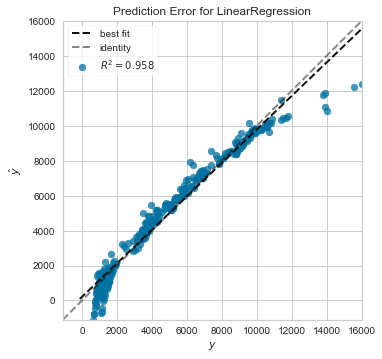

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [13]:
reg = LinearRegression()
reg.fit(X,y)
yhat = reg.predict(X)
visualizer = PredictionError(reg)
visualizer.fit(X,y)
visualizer.score(X,y)
visualizer.show()
